# Import the libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import pickle

# Load the California House Pricing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
## Lets check the description of the dataset

print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
## Lets check the data of the dataset

print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
## Lets check the target of the dataset

print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
## Lets check the target_names of the dataset

print(california.target_names)

['MedHouseVal']


In [8]:
## Lets check the feature_names of the dataset

print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Preparing the dataset

In [9]:
#Lets get the data in dataframe and add column names to it

dataset=pd.DataFrame(california.data, columns=california.feature_names)

In [10]:
#Lets add the target column to the dataset

dataset['Price'] = california.target

In [11]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
## summarizing the stats of data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Exploratory Data Analysis

In [14]:
# check for correlation

dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0.5, 0, 'price')

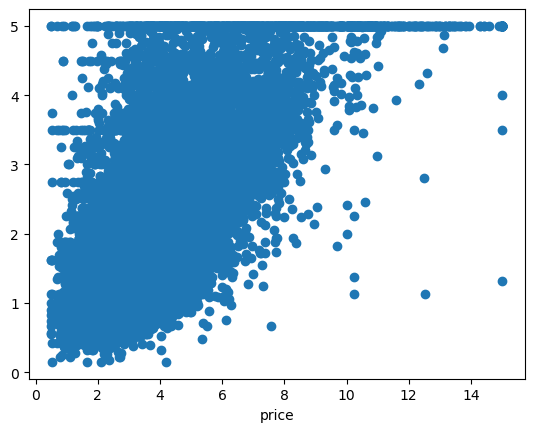

In [15]:
#sns.pairplot(dataset)

plt.scatter(dataset['MedInc'] , dataset['Price']) 

plt.xlabel('median income')
plt.xlabel('price')

Text(0.5, 0, 'price')

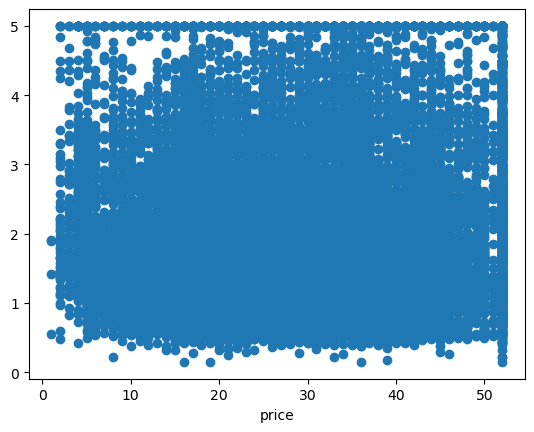

In [16]:
plt.scatter(dataset['HouseAge'] , dataset['Price']) 

plt.xlabel('House Age')
plt.xlabel('price')

<AxesSubplot: xlabel='AveRooms', ylabel='Price'>

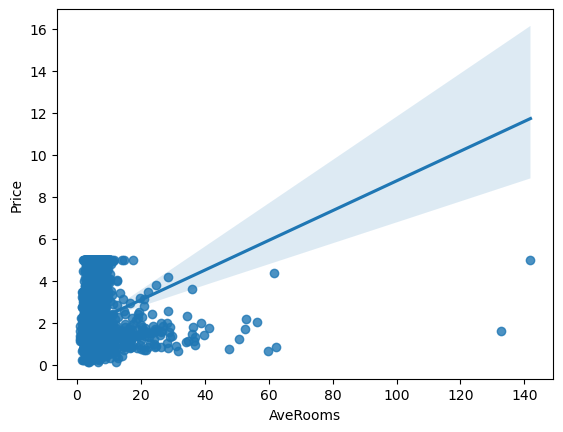

In [17]:
sns.regplot(x="AveRooms", y="Price" , data=dataset)

# Splitting the data

In [18]:
# Independent and dependent features

In [19]:
X = dataset.iloc[:,:-1]

In [20]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
y = dataset.iloc[:,-1]

In [22]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [23]:
#train test split

X_train ,X_test , y_train , y_test = train_test_split(X, y, test_size=0.3 , random_state= 42)

In [24]:
## standardize the data
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Building

In [26]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
#print coeff and intercept

print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [28]:
print(regression.intercept_)

2.0692396089424165


In [29]:
## on which parameters the model is trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [30]:
reg_pred=regression.predict(X_test)

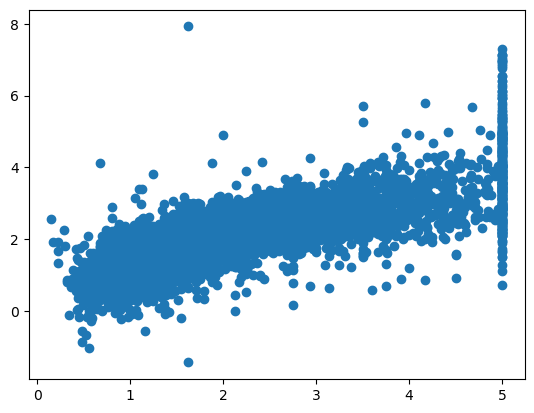

In [31]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [32]:
residuals = y_test-reg_pred

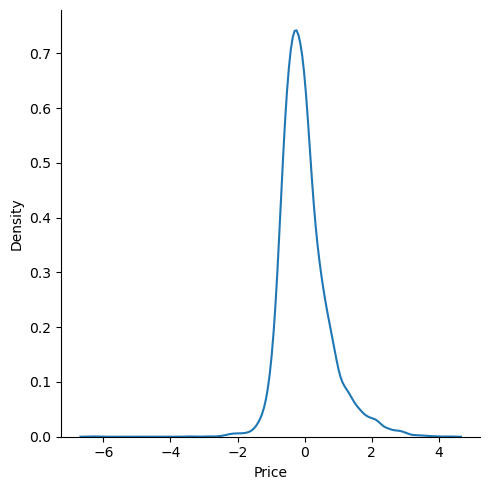

In [33]:
# plot this residuals

sns.displot(residuals , kind="kde")

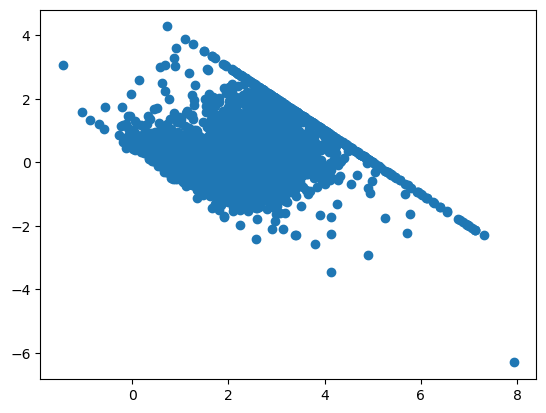

In [34]:
## scatter plot wrt predictions and residuals

plt.scatter(reg_pred, residuals)

In [35]:
# metrics
print(mean_absolute_error(y_test , reg_pred))
print(mean_squared_error(y_test , reg_pred))

print(np.sqrt(mean_squared_error(y_test , reg_pred)))

0.5238759626552133
0.5165967398485736
0.7187466451042214


In [36]:
# r-square and adj r-squared

score = r2_score(y_test, reg_pred)
      

In [37]:
score

0.6064145112418657

In [38]:
1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.605905262671582

# New Data Prediction

In [45]:
california.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [40]:
california.data[0].shape

(8,)

In [42]:
california.data[0].reshape(1,-1).shape

(1, 8)

In [ ]:
#without scaling

In [43]:
regression.predict(california.data[0].reshape(1,-1))

array([84.33102212])

In [ ]:
#with scaling

In [44]:
regression.predict(scaler.fit_transform(california.data[0].reshape(1,-1)))

array([2.06923961])

# Pickle the model for deployment

In [51]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [52]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [53]:
pickled_model.predict(scaler.fit_transform(california.data[0].reshape(1,-1)))

array([2.06923961])